In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global NumSpecies,mu,lambdaa,gamma,D,eta,kappa
mu0=0.5
Ns=np.arange(2,28,2)
etas=[0,0.1,0.2]
repeat=500
gamma=0.9
kappa=0.005
D=0.2
diversity=np.zeros((len(Ns),len(etas),repeat))
richness=np.zeros((len(Ns),len(etas),repeat))
CoexistProb=np.zeros((len(Ns),len(etas)))
thresh=0.01
timespan=np.arange(0,200,0.1)

In [3]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            if i!=j:
                ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
            sumy=sumy+y[j]
        dydt[i]=mu[i]*y[i]*ss*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    ss=1
                    for k in range(NumSpecies):
                        if (k!=i)&(k!=j):
                            ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1-(gamma*sumy-gamma*y[i]+y[i]))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

In [4]:
for uio in range(len(Ns)):
    print(uio)
    NumSpecies=Ns[uio]
    initial=np.zeros(NumSpecies**2+NumSpecies)
    for i in range(NumSpecies):
        initial[i]=1/NumSpecies
        initial[NumSpecies+i*NumSpecies+i]=initial[i]

    for i in range(len(etas)):
        eta=etas[i]
        for hjk in range(repeat):
            lambdaa=(-0.2+0.4*np.random.rand(NumSpecies))
            mu=mu0*(1+lambdaa)
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y1=sol.y
            temp=y1[range(NumSpecies),-1]
            temp=np.divide(temp,sum(temp))
            diversity[uio,i,hjk]=np.exp(-sum(np.multiply(temp,np.log(temp))))
            richness[uio,i,hjk]=sum(y1[range(NumSpecies),-1]>thresh)
        CoexistProb[uio,i]=sum(richness[uio,i,:]==NumSpecies)/repeat


0
1
2
3
4
5
6
7
8
9
10
11
12


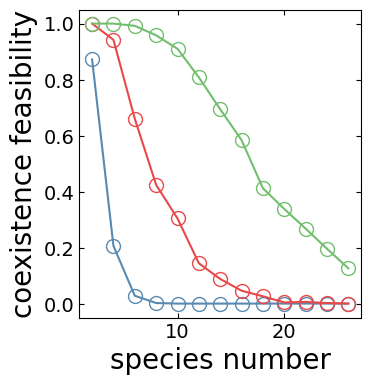

In [8]:
plt.figure(figsize=(12/3.3,4))
for i in range(len(etas)):
    if i==0:
        plt.plot(Ns,CoexistProb[:,i],'o-',markersize=10,fillstyle='none',color=(0.3467,0.5360,0.6907))
    if i==1:
        plt.plot(Ns,CoexistProb[:,i],'o-',markersize=10,fillstyle='none',color=(0.9153,0.2816,0.2878))
    if i==2:
        plt.plot(Ns,CoexistProb[:,i],'o-',markersize=10,fillstyle='none',color=(0.4416,0.7490,0.4322))
plt.rcParams['font.size'] =14
plt.xlabel('species number',fontsize=20)
plt.ylabel('coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('MultiSpeciesCoexistenceFeasibility.pdf')
plt.show()

In [6]:
import pandas as pd
df=pd.DataFrame(CoexistProb)
df.to_csv("MultiSpeciesCoexistenceFeasibility.csv")